# Statistical Learning HW2: Regression models

In [1]:
import pandas as pd
from pandas.plotting import scatter_matrix
from sklearn import preprocessing
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Load data and quick review of data

In [2]:
# Load all datasets
orig_df = pd.read_csv("df1_train.csv") 
test_X_df = pd.read_csv("df1_test1.csv")
test_Y_df = pd.read_csv("df1_test1y.csv")
# Preview the first 5 lines of the loaded data 
orig_df.head()

,life_post_consumer,comp_page_like,Paid,life_post_reach,life_post_impression_liked,life_post_reach_liked,comment,like,share,type_link,...,hour5,hour6,hour7,hour8,hour9,hour10,hour11,hour12,hour13,hour14
0,523,125612,0,2763,3519,2124,0,62,10,0,...,0,0,0,0,0,0,0,0,0,0
1,408,135700,0,3756,4935,2556,16,117,30,0,...,0,0,0,0,0,0,1,0,0,0
2,37,137020,1,1357,2154,1120,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,808,137893,1,37376,22100,10880,20,411,74,0,...,0,0,0,0,0,0,0,0,0,0
4,359,133594,0,1809,2541,1435,2,64,7,0,...,0,0,0,1,0,0,0,0,0,0


# Exploratory Data Analysis (EDA)

## Q1 EDA

In [3]:
import statsmodels.api as sm
eda_df = orig_df.copy()

### ● Y Values

count      400.000
mean       810.340
std        899.037
min         17.000
25%        335.000
50%        554.500
75%        955.500
max      11328.000
Name: life_post_consumer, dtype: float64


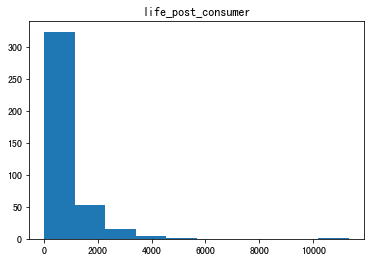

In [4]:
_y = "life_post_consumer"
print(eda_df[_y].describe().round(3))
plt.hist(eda_df[_y].values)
plt.title("life_post_consumer")
plt.show()

###  ● Continuous Variables 

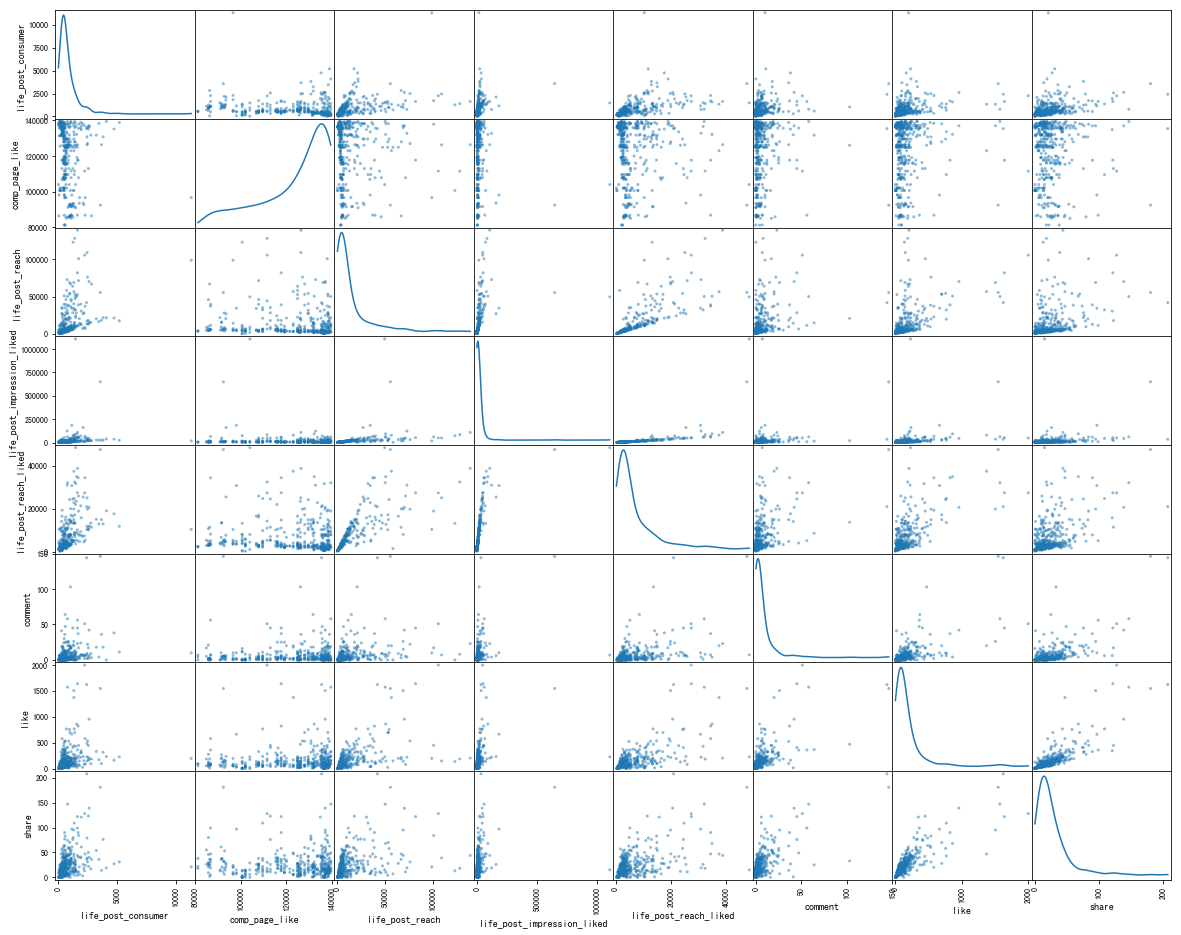

In [5]:
#Continuous
con_attributes = ["comp_page_like", "life_post_reach", "life_post_impression_liked",
                  "life_post_reach_liked", "comment", "like", "share"]
continuous_attr = [_y] + con_attributes
scatter = scatter_matrix(orig_df[continuous_attr], figsize=(20, 16), diagonal='kde')

In [6]:
X_con = eda_df[con_attributes]
Y_con = eda_df[_y]
sm_result = sm.OLS(Y_con, sm.tools.add_constant(X_con)).fit()
print(sm_result.summary())

                            OLS Regression Results                            
Dep. Variable:     life_post_consumer   R-squared:                       0.318
Model:                            OLS   Adj. R-squared:                  0.306
Method:                 Least Squares   F-statistic:                     26.17
Date:                Tue, 19 Mar 2019   Prob (F-statistic):           2.23e-29
Time:                        01:46:36   Log-Likelihood:                -3210.9
No. Observations:                 400   AIC:                             6438.
Df Residuals:                     392   BIC:                             6470.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

### ● Dummy Variables

In [7]:
paid_dum = ['Paid']
type_dum = ['type_link', 'type_status', 'type_video']
cat_dum = ['cat2', 'cat3']
month_dum = ['month1', 'month2', 'month3', 'month4', 'month5', 'month6',
             'month7', 'month8', 'month9', 'month10', 'month11']
dow_dum = ['dow1', 'dow2', 'dow3', 'dow4', 'dow5', 'dow6']
hour_dum = ['hour2', 'hour3', 'hour4', 'hour5', 'hour6', 'hour7', 'hour8',
            'hour9', 'hour10', 'hour11', 'hour12', 'hour13', 'hour14']
dumc_attributes = paid_dum + type_dum + cat_dum + month_dum + dow_dum + hour_dum

def count_dum(columns):
    
    counts = []
    for c in columns:
        counts.append((eda_df[c] != 0).sum())
    
    count_sum = sum(counts)
    other_dum = len(eda_df[_y].values) - count_sum
    counts.append(other_dum)     
    
    return counts

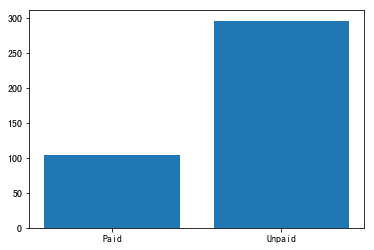

In [8]:
plt.bar(paid_dum + ["Unpaid"], count_dum(paid_dum))
plt.show()

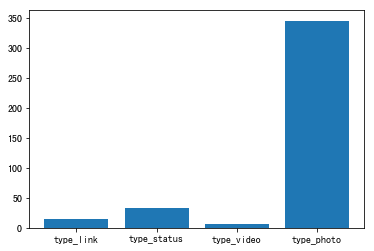

In [9]:
plt.bar(type_dum + ["type_photo"], count_dum(type_dum))
plt.show()

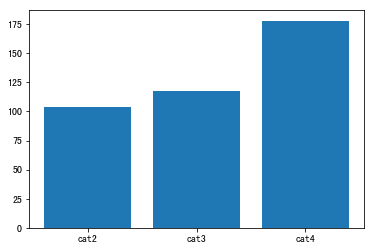

In [10]:
plt.bar(cat_dum + ["cat4"], count_dum(cat_dum))
plt.show()

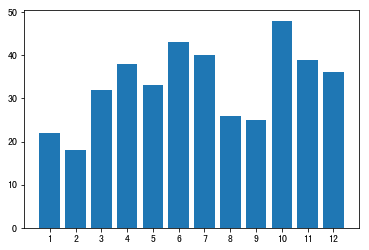

In [11]:
plt.bar(["1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "12"], count_dum(month_dum))
plt.show()

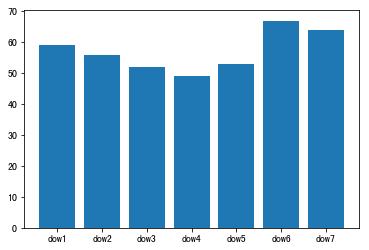

In [12]:
plt.bar(dow_dum + ["dow7"], count_dum(dow_dum))
plt.show()

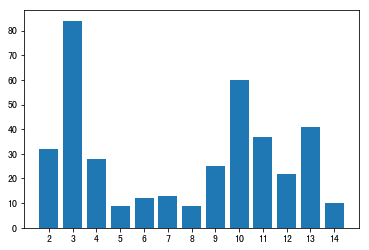

In [13]:
hour = count_dum(hour_dum)
del hour[len(hour)-1]
plt.bar(['2', '3', '4', '5', '6', '7', '8',
            '9', '10', '11', '12', '13', '14'], hour)
plt.show()

In [14]:
X_dum = eda_df[dumc_attributes]
Y_dum = eda_df[_y]
sm_result_dum = sm.OLS(Y_dum, sm.tools.add_constant(X_dum)).fit()
print(sm_result_dum.summary())

                            OLS Regression Results                            
Dep. Variable:     life_post_consumer   R-squared:                       0.324
Model:                            OLS   Adj. R-squared:                  0.257
Method:                 Least Squares   F-statistic:                     4.840
Date:                Tue, 19 Mar 2019   Prob (F-statistic):           1.20e-15
Time:                        01:46:36   Log-Likelihood:                -3209.2
No. Observations:                 400   AIC:                             6492.
Df Residuals:                     363   BIC:                             6640.
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         156.9435    272.926      0.575      

# Q1 observations:
    1. Y值分佈並未呈常態分佈，且有極值
    2. 在連續型函數總結當中，可以發現 R-squared 僅有 0.318，表示變數的解釋能力並不高
    3. 連續型變數當中，life_post_impression_liked 的t檢定 p-value 為 0.062 > 0.05 表示其在統計上不顯著
    4. 連續型變數當中，comment、share 的回歸係數為8.3305、8.0670，較其他變數都來得大，顯示每多一個留言或分享，Y值會提升較多
    5. 在虛擬變數當中，可看出沒有付費、為照片形式的貼文較多，假日數量相較平日多，且時間多為3點、10點或13點
    6. 虛擬變數的總結的 R-squared 為 0.324，變數解釋能力也不高
    7. 在虛擬變數總結中，有過半的變數t檢定的p-value皆大於0.05 表示許多變數在統計上不顯著
    8. 從上述分析可以發現，此資料集中許多變數對於預測可能並沒有幫助，適當的減少變數應會有助於預測準確度的提升。

### Data Preprocessing

In [15]:
#取得所有columns的名字，並區分為x特徵和y結果
column_names = list(orig_df)
X_train_name = column_names[1:]
Y_train_name = column_names[0]

#皆沒有標準化
X_train = orig_df[X_train_name].values
X_test = test_X_df[X_train_name].values
#全部特徵皆標準化
scaler = preprocessing.StandardScaler().fit(orig_df[X_train_name])
X_train_sta = scaler.transform(orig_df[X_train_name])
X_test_sta = scaler.transform(test_X_df[X_train_name])
#僅連續變數標準化
new_train_df = orig_df.copy()
con_scaler = preprocessing.StandardScaler().fit(new_train_df[con_attributes])
new_train_df[con_attributes] = con_scaler.transform(new_train_df[con_attributes])
X_train_consta = new_train_df[X_train_name].values
new_test_df = test_X_df.copy()
new_test_df[con_attributes] = con_scaler.transform(new_test_df[con_attributes])
X_test_consta = new_test_df[X_train_name].values

#training dataset's y values
Y_train = (orig_df[Y_train_name]).values
#test dataset's y values
Y_test = (test_Y_df[Y_train_name]).values
#training dataset's y mean value
Y_train_mean = Y_train.mean()
#de-meaned y list
Y_demeaned = [y - Y_train_mean for y in Y_train]

In [16]:
print(X_train_name)

['comp_page_like', 'Paid', 'life_post_reach', 'life_post_impression_liked', 'life_post_reach_liked', 'comment', 'like', 'share', 'type_link', 'type_status', 'type_video', 'cat2', 'cat3', 'month1', 'month2', 'month3', 'month4', 'month5', 'month6', 'month7', 'month8', 'month9', 'month10', 'month11', 'dow1', 'dow2', 'dow3', 'dow4', 'dow5', 'dow6', 'hour2', 'hour3', 'hour4', 'hour5', 'hour6', 'hour7', 'hour8', 'hour9', 'hour10', 'hour11', 'hour12', 'hour13', 'hour14']


In [17]:
def rmse(ypred):
    rmse = np.sqrt(np.mean(np.square(Y_test - ypred)))
    return rmse

def addmean(y_pred):
    return [y + Y_train_mean for y in y_pred]

def print_info(preds):
    print("RMSE:", rmse(preds))
    print(preds[:20])
    print(Y_test[:20])

# Cases we are going to test.
● Two preprocessing procedures for outcome values  y
 , we can choose to (1) keep the original numerical value (referred to as "keep"), or (2) de-mean. If the de-meaned y
  is used in model training, then we need to add y¯train to the prediction. The reason is obvious: we need to shift the mean back to  y¯train.
  
● std. means we standardize the feature values by subtracting the mean and then dividing the residuals with their standad deviation.

<img src="cases.png" style="height: 30%; width: 30%">

In [42]:
Cases

,Case,Method,x_continue,x_binary,y
0,1,ymean,not used,not used,keep
1,2A,OLS,keep,keep,keep
2,2B,OLS,keep,keep,de-mean
3,2C,OLS,std.,std.,de-mean
4,3A,Ridge,keep,keep,keep
5,3B,Ridge,std.,keep,de-mean
6,3C,Ridge,keep,keep,de-mean
7,3D,Ridge,std.,std.,de-mean
8,4,Lasso,std.,keep,de-mean


## Q2 (Case 1)

In [18]:
predicted_1 = [Y_train_mean] * len(test_X_df[X_train_name[0]].values)
print_info(predicted_1)

RMSE: 928.8095109332162
[810.34, 810.34, 810.34, 810.34, 810.34, 810.34, 810.34, 810.34, 810.34, 810.34, 810.34, 810.34, 810.34, 810.34, 810.34, 810.34, 810.34, 810.34, 810.34, 810.34]
[1183  189 2327   76  354  713  204  288  555  586  446  884  524  672
   23  570 1361 5934 2319 1633]


# Linear Regression

In [19]:
from sklearn.linear_model import LinearRegression
#create a LinearRegression object
lm = LinearRegression()

## Q3 (Case 2A)

In [20]:
lm.fit(X_train, orig_df[Y_train_name])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [21]:
predicted_2a = lm.predict(X_test)
print_info(predicted_2a)

RMSE: 692.2891271362123
[ 781.57991507  315.92043112 2279.0848524  -136.34286373  302.35624062
  462.42402368  321.67770824  504.52244768  505.89547104  488.36700578
  392.61423519  388.9184671   804.87527509  634.32364432  176.31765618
  645.7291381  1983.53858871 3144.39710045 4060.61071218 4288.223081  ]
[1183  189 2327   76  354  713  204  288  555  586  446  884  524  672
   23  570 1361 5934 2319 1633]


## Q4 (Case 2B) 

In [22]:
lm.fit(X_train, Y_demeaned)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [23]:
de_predicted_2b = lm.predict(X_test)
predicted_2b = addmean(de_predicted_2b)
print_info(predicted_2b)

RMSE: 692.2891271362292
[781.5799150700421, 315.9204311202392, 2279.084852401026, -136.3428637269045, 302.35624062184604, 462.42402367965394, 321.67770824406387, 504.5224476765651, 505.8954710413726, 488.367005780441, 392.61423519414336, 388.918467099087, 804.875275089871, 634.323644316033, 176.3176561846775, 645.72913809708, 1983.5385887132088, 3144.3971004537143, 4060.61071217498, 4288.223080997918]
[1183  189 2327   76  354  713  204  288  555  586  446  884  524  672
   23  570 1361 5934 2319 1633]


## Q5 (Case 2C) 

In [24]:
lm.fit(X_train_sta, Y_demeaned)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [25]:
de_predicted_2c = lm.predict(X_test_sta)
predicted_2c = addmean(de_predicted_2c)
print_info(predicted_2c)

RMSE: 692.2891271372
[781.5799150726232, 315.92043111964875, 2279.084852399019, -136.34286372742736, 302.3562406214676, 462.4240236767437, 321.67770824388435, 504.522447673222, 505.8954710382994, 488.36700578017224, 392.61423519385, 388.918467098667, 804.8752750893699, 634.323644315927, 176.3176561841534, 645.7291380940394, 1983.538588713539, 3144.3971004532436, 4060.610712187081, 4288.223081003452]
[1183  189 2327   76  354  713  204  288  555  586  446  884  524  672
   23  570 1361 5934 2319 1633]


# Ridge Regression

In [26]:
from sklearn.linear_model import Ridge

# different regularization coefficient (α)
alpha = [0.01, 0.1, 1, 5, 10, 20, 50, 100, 500, 1000]
index_min = 0

def print_alpha_info(rmses, predictions):
    print("RMSE (α=%d): %f" % (alpha[index_min], rmses[index_min]))
    print(predictions[index_min][:20])
    print(Y_test[:20])

## Q6 (Case 3A)

In [27]:
predicteds_3a = []
rmses_3a = []
for a in alpha:
    ridge_model = Ridge(alpha=a)
    ridge_model.fit(X_train, orig_df[Y_train_name])   # 线性回归建模
    predicted_3a = ridge_model.predict(test_X_df[X_train_name])
    predicteds_3a.append(predicted_3a)
    rmses_3a.append(rmse(predicted_3a))

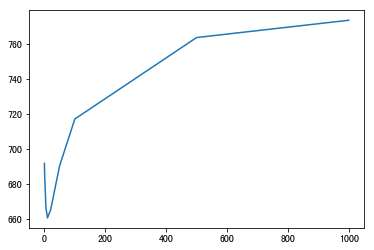

RMSE (α=10): 660.561290
[1068.33362385  229.7553192  2008.55889192 -102.8748995   541.45769947
  606.45925756  414.98279829  602.81051442  500.18438508  492.30663558
  508.37649961  409.13002153  730.46768043  561.0603282   294.45089723
  602.48286746 1632.18271503 2698.88281782 3841.63152846 3892.40090903]
[1183  189 2327   76  354  713  204  288  555  586  446  884  524  672
   23  570 1361 5934 2319 1633]


In [28]:
plt.plot(alpha, rmses_3a)
plt.show()
index_min = np.argmin(rmses_3a)
print_alpha_info(rmses_3a, predicteds_3a)

## Q7 (Case 3B)

In [29]:
predicteds_3b = []
rmses_3b = []
for a in alpha:
    ridge_model = Ridge(alpha=a)
    ridge_model.fit(X_train_consta, Y_demeaned)   # 线性回归建模
    de_predicted_3b = ridge_model.predict(X_test_consta)
    predicted_3b = addmean(de_predicted_3b)
    predicteds_3b.append(predicted_3b)
    rmses_3b.append(rmse(predicted_3b))

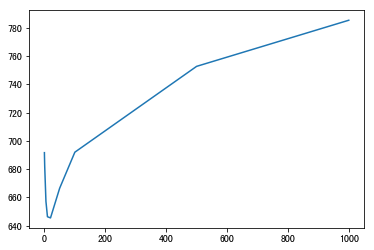

RMSE (α=20): 645.516812
[1142.269542340836, 254.157014921116, 1834.0248894378174, 15.718168704052914, 599.7636629205392, 635.9403898439427, 427.85644415790193, 603.6620598910198, 514.5237878678296, 580.0010600720799, 544.341760209828, 477.18442083888635, 801.5455454188353, 557.4528723791392, 396.27886547830883, 615.1515241152466, 1474.6741737563502, 2504.8643727349986, 3524.8596448111184, 3438.403437134934]
[1183  189 2327   76  354  713  204  288  555  586  446  884  524  672
   23  570 1361 5934 2319 1633]


In [30]:
plt.plot(alpha, rmses_3b)
plt.show()
index_min = np.argmin(rmses_3b)
print_alpha_info(rmses_3b, predicteds_3b)

## Q8 (Case 3C) 

In [31]:
predicteds_3c = []
rmses_3c = []
for a in alpha:
    ridge_model = Ridge(alpha=a)
    ridge_model.fit(X_train, Y_demeaned)
    de_predicted_3c = ridge_model.predict(X_test)
    predicted_3c = addmean(de_predicted_3c)
    predicteds_3c.append(predicted_3c)
    rmses_3c.append(rmse(predicted_3c))

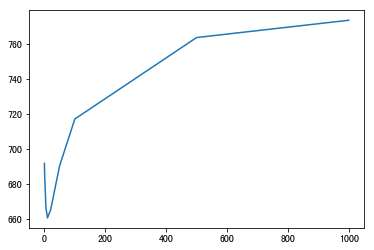

RMSE (α=10): 660.561290
[1068.3336238492388, 229.75531919984053, 2008.558891921327, -102.87489949962958, 541.4576994726491, 606.4592575585207, 414.9827982946771, 602.8105144219196, 500.1843850761294, 492.30663558106437, 508.37649961334785, 409.1300215282557, 730.4676804339113, 561.0603282026204, 294.4508972276841, 602.4828674601835, 1632.1827150344566, 2698.882817822703, 3841.631528462281, 3892.4009090260265]
[1183  189 2327   76  354  713  204  288  555  586  446  884  524  672
   23  570 1361 5934 2319 1633]


In [32]:
plt.plot(alpha, rmses_3c)
plt.show()
index_min = np.argmin(rmses_3c)
print_alpha_info(rmses_3c, predicteds_3c)

## Q9 (Case 3D) 

In [33]:
predicteds_3d = []
rmses_3d = []
for a in alpha:
    ridge_model = Ridge(alpha=a)
    ridge_model.fit(X_train_sta, Y_demeaned)
    de_predicted_3d = ridge_model.predict(X_test_sta)
    predicted_3d = addmean(de_predicted_3d)
    predicteds_3d.append(predicted_3d)
    rmses_3d.append(rmse(predicted_3d))

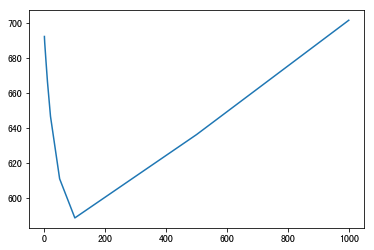

RMSE (α=100): 588.793466
[1040.5001226108072, 278.46504979772, 1997.724464270033, -21.140365018157354, 554.2152570974529, 602.8406419024144, 337.5234695915467, 599.435785262659, 470.29370415993515, 500.7241404018719, 511.1486191203529, 387.74355349650676, 700.089576518129, 532.2228096919928, 255.18311778364523, 653.3563783030608, 1728.1691916931404, 2775.002710950044, 3174.792251892935, 3141.8579760883263]
[1183  189 2327   76  354  713  204  288  555  586  446  884  524  672
   23  570 1361 5934 2319 1633]


In [34]:
plt.plot(alpha, rmses_3d)
plt.show()
index_min = np.argmin(rmses_3d)
print_alpha_info(rmses_3d, predicteds_3d)

# Lasso Regression

In [35]:
from sklearn.linear_model import Lasso

## Q10 (Case 4) 

In [36]:
predicteds_4 = []
rmses_4 = []
for a in alpha:
    lasso_model = Lasso(alpha=a)
    lasso_model.fit(X_train_consta, Y_demeaned)
    de_predicted_4 = lasso_model.predict(X_test_consta)
    predicted_4 = addmean(de_predicted_4)
    predicteds_4.append(predicted_4)
    rmses_4.append(rmse(predicted_4))

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


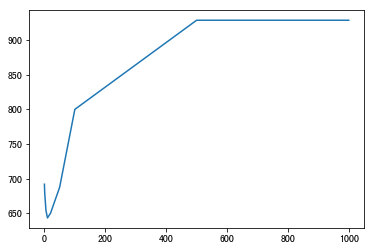

RMSE (α=10): 643.383848
[1241.5985849255558, 287.8887606165928, 2119.9067473192517, -16.297183263599095, 449.10115060818737, 711.1455910838515, 398.05917414825814, 460.1512424769557, 645.4429975283161, 591.436454261299, 429.9661929979602, 461.48315207255587, 899.8092875270692, 571.8664062109583, 352.8652196795029, 548.0853247508958, 1741.0151105636191, 2712.054391668527, 3681.459427440289, 3645.114033067593]
[1183  189 2327   76  354  713  204  288  555  586  446  884  524  672
   23  570 1361 5934 2319 1633]


In [37]:
plt.plot(alpha, rmses_4)
plt.show()
index_min = np.argmin(rmses_4)
print_alpha_info(rmses_4, predicteds_4)

## Q11

In [38]:
final_result = pd.read_csv("result.csv")
final_result

,Case,Method,x_continue,x_binary,y,α,RMSE
0,1,ymean,not used,not used,keep,0,928.809511
1,2A,OLS,keep,keep,keep,0,692.289127
2,2B,OLS,keep,keep,de-mean,0,692.289127
3,2C,OLS,std.,std.,de-mean,0,692.289127
4,3A,Ridge,keep,keep,keep,10,660.561290
5,3B,Ridge,std.,keep,de-mean,20,645.516812
6,3C,Ridge,keep,keep,de-mean,10,660.561290
7,3D,Ridge,std.,std.,de-mean,100,588.793466
8,4,Lasso,std.,keep,de-mean,10,643.383848


# Observations:
    1. 用training data的y值平均作為預測值的RMSE，相較於有做回歸預測的誤差來得大，顯示回歸預測的確有助於更了解欲求的Y值
    2. 在OLS的case當中，可發現不論是否標準化特徵或使用de-mean方法，誤差皆相同
    3. 在Ridge Regression的模型下，不標準化特徵，有使用de-mean與否，不影響誤差值和誤差最小時的α值
    4. 在Ridge Regression的模型和使用de-mean的方法下，隨著連續變數標準化後，RMSE下降，且α值上升為20，近一步再標準化binary資料後，誤差值變得更小，且α值來到100，可顯示出標準化特徵有助於Ridge回歸預測
    5. 在Lasso回歸，僅標準化連續型變數和使用de-mean的方法時，我們可以發現誤差值和case 3B相去不遠，且α值皆為10
    6. 所有case當中，以OLS的誤差最大，以case 3D的RMSE最小，而且α值最大，α值越大表示模型係數會被往0拉，有些相對不重要的特徵，對於預測的影響程度會變小
    7. 在探索資料集時，若發現變數並不能很好解釋Y值時，可考慮使用有懲罰項的Ridge或Lasso回歸，將一些較不重要的特徵係數拉接近零，有助於預測誤差下降，且在這兩個個回歸之下，將特徵標準化也能降低誤差。